# PANDAS

'

In [9]:
import pandas as pd
import numpy as np

## series

series uma estrutura de dados

In [10]:
lista = [1,2,6,7,9]
array = np.array([2,4,6,8,10])
dicionario = {'a':3,'b':6,'c':True,'d':'any string'}

In [11]:
serie1 = pd.Series(lista)
serie2 = pd.Series(array, index=lista)
serie3 = pd.Series(dicionario)

In [12]:
display(serie1, serie2)

0    1
1    2
2    6
3    7
4    9
dtype: int64

1     2
2     4
6     6
7     8
9    10
dtype: int32

In [13]:
print(serie3['d'])

any string


In [14]:
fnList = [sum, print, len, max, min, round]
fnIndex = ['s','p','l','mx','mn','r']
fn = pd.Series(fnList, fnIndex)

In [15]:
fn.s([10,20])

30

In [16]:
fn.mx(serie2)

10

In [17]:
fn.p(fn.l(fn))

6


Soma entre series soma os valores com indices correspondentes, onde só indice em uma das series é retornado NaN

In [18]:
sr1 = pd.Series([1,2,3,4],['SP','MG','ES','GO'])
sr2 = pd.Series([8,2,5,4],['RJ','GO','MG','SP'])

In [19]:
print(sr1+sr2)

ES    NaN
GO    6.0
MG    7.0
RJ    NaN
SP    5.0
dtype: float64


'
## DataFrames (folhas de dados)

DataFrames são tabelas de dados, é basicamente um conteiner com diversas series

In [20]:
df = pd.DataFrame()

df['col1'] = [3,4,6,7,8]

df['percent'] = df['col1'] / df['col1'].sum()

In [21]:
df['%_of_Total'] = ['{:.4}%'.format(percent * 100) for percent in df['percent']]

In [22]:
print(df)

   col1   percent %_of_Total
0     3  0.107143     10.71%
1     4  0.142857     14.29%
2     6  0.214286     21.43%
3     7  0.250000      25.0%
4     8  0.285714     28.57%


In [23]:
print(df['percent'].sum())

1.0


In [24]:
df = pd.DataFrame(np.array(np.round(np.random.rand(5,4)*10)),index=range(5), columns="A B C D".split())

In [25]:
print(df)

     A    B    C    D
0  8.0  5.0  5.0  4.0
1  7.0  7.0  1.0  9.0
2  9.0  9.0  8.0  6.0
3  9.0  6.0  6.0  0.0
4  9.0  6.0  6.0  9.0


In [26]:
display(df)

,A,B,C,D
0,8.0,5.0,5.0,4.0
1,7.0,7.0,1.0,9.0
2,9.0,9.0,8.0,6.0
3,9.0,6.0,6.0,0.0
4,9.0,6.0,6.0,9.0


In [27]:
df['new'] = df['A'] + df['B']

In [28]:
display(df)

,A,B,C,D,new
0,8.0,5.0,5.0,4.0,13.0
1,7.0,7.0,1.0,9.0,14.0
2,9.0,9.0,8.0,6.0,18.0
3,9.0,6.0,6.0,0.0,15.0
4,9.0,6.0,6.0,9.0,15.0


In [29]:
df['mediaABC'] = df['A'] + df['B'] + df['C'] / 3

In [30]:
display(df)

,A,B,C,D,new,mediaABC
0,8.0,5.0,5.0,4.0,13.0,14.666667
1,7.0,7.0,1.0,9.0,14.0,14.333333
2,9.0,9.0,8.0,6.0,18.0,20.666667
3,9.0,6.0,6.0,0.0,15.0,17.000000
4,9.0,6.0,6.0,9.0,15.0,17.000000


In [31]:
df[['new', 'A']].describe()

,new,A
count,5.000000,5.000000
mean,15.000000,8.400000
std,1.870829,0.894427
min,13.000000,7.000000
25%,14.000000,8.000000
50%,15.000000,9.000000
75%,15.000000,9.000000
max,18.000000,9.000000


In [32]:
df.C

0    5.0
1    1.0
2    8.0
3    6.0
4    6.0
Name: C, dtype: float64

In [33]:
df.drop('new', axis=1)

,A,B,C,D,mediaABC
0,8.0,5.0,5.0,4.0,14.666667
1,7.0,7.0,1.0,9.0,14.333333
2,9.0,9.0,8.0,6.0,20.666667
3,9.0,6.0,6.0,0.0,17.000000
4,9.0,6.0,6.0,9.0,17.000000


In [34]:
print(df)

     A    B    C    D   new   mediaABC
0  8.0  5.0  5.0  4.0  13.0  14.666667
1  7.0  7.0  1.0  9.0  14.0  14.333333
2  9.0  9.0  8.0  6.0  18.0  20.666667
3  9.0  6.0  6.0  0.0  15.0  17.000000
4  9.0  6.0  6.0  9.0  15.0  17.000000


In [35]:
df.drop('new', axis=1, inplace= True)

In [36]:
display(df)

,A,B,C,D,mediaABC
0,8.0,5.0,5.0,4.0,14.666667
1,7.0,7.0,1.0,9.0,14.333333
2,9.0,9.0,8.0,6.0,20.666667
3,9.0,6.0,6.0,0.0,17.000000
4,9.0,6.0,6.0,9.0,17.000000


In [37]:
df.loc[2]

A            9.000000
B            9.000000
C            8.000000
D            6.000000
mediaABC    20.666667
Name: 2, dtype: float64

In [38]:
df.loc[0,'A']

8.0

In [39]:
#Metodo iloc podemos usar notação de numpy

df.iloc[3:]

,A,B,C,D,mediaABC
3,9.0,6.0,6.0,0.0,17.0
4,9.0,6.0,6.0,9.0,17.0


In [40]:
df.iloc[:2, 2:]

,C,D,mediaABC
0,5.0,4.0,14.666667
1,1.0,9.0,14.333333


In [41]:
df.iloc[:,-1].name

'mediaABC'

In [42]:
df.iloc[3,2]

6.0

## Index Multinivel

#### Com esse metodo podemos organizar e filtrar informações através de mais de um indice em um DF

In [43]:
url = 'https://support.microsoft.com/pt-br/office/sobre-as-fontes-de-dados-de-a%C3%A7%C3%B5es-financeiras-98a03e23-37f6-4776-beea-c5a6c8e787e6'

df = pd.read_html(url)[0]



In [44]:
df.columns = df.loc[0]
df = df.loc[1:]

In [45]:
display(df.head(2))

,País,Código do país,Código Identificador de Mercado,Nome do Exchange,Fuso horário,Diferença UTC,Atraso (minutos)
1,Argentina,AR,XBUE,Bolsa de Comércio de Buenos Aires,ART,-3,30
2,Austrália,AU,XASX,Bolsa de Valores da Austrália,AEST,10,20


In [46]:
df = df.set_index(['Código do país', 'Fuso horário'])

In [47]:
df = df.sort_index()

display(df.head())

,,País,Código Identificador de Mercado,Nome do Exchange,Diferença UTC,Atraso (minutos)
Código do país,Fuso horário,,,,,
AR,ART,Argentina,XBUE,Bolsa de Comércio de Buenos Aires,-3,30
AT,CET,Áustria,XWBO,Bolsa de Viena,1,15
AU,AEST,Austrália,XASX,Bolsa de Valores da Austrália,10,20
BE,CET,Bélgica,XBRU,Bolsa de Bruxelas,1,15
BR,BRT,Brasil,BVMF,BM&FBOVESPA,-3,30


In [48]:
display(df.loc['US'])

,País,Código Identificador de Mercado,Nome do Exchange,Diferença UTC,Atraso (minutos)
Fuso horário,,,,,
EST,Estados Unidos da América,BATS,Cboe BZX Exchange,-5,0
EST,Estados Unidos da América,XNASB,Nasdaq Last Sale,-5,0
EST,Estados Unidos da América,XNAS,Bolsa de Valores Nasdaq,-5,15
EST,Estados Unidos da América,XNYS,Bolsa de Valores de Nova Iorque,-5,15
EST,Estados Unidos da América,ARCX,NYSE Arca,-5,15
EST,Estados Unidos da América,OTCM,Mercados OTC,-5,15


In [49]:
df.xs('US')

,País,Código Identificador de Mercado,Nome do Exchange,Diferença UTC,Atraso (minutos)
Fuso horário,,,,,
EST,Estados Unidos da América,BATS,Cboe BZX Exchange,-5,0
EST,Estados Unidos da América,XNASB,Nasdaq Last Sale,-5,0
EST,Estados Unidos da América,XNAS,Bolsa de Valores Nasdaq,-5,15
EST,Estados Unidos da América,XNYS,Bolsa de Valores de Nova Iorque,-5,15
EST,Estados Unidos da América,ARCX,NYSE Arca,-5,15
EST,Estados Unidos da América,OTCM,Mercados OTC,-5,15


In [50]:
df.xs('EST', level='Fuso horário')

,País,Código Identificador de Mercado,Nome do Exchange,Diferença UTC,Atraso (minutos)
Código do país,,,,,
CA,Canadá,XCNQ,Bolsa de Valores Nacional Canadense,-5,15
CA,Canadá,XTSE,Bolsa de Valores de Toronto,-5,20
CA,Canadá,XTSX,TSX Venture Exchange,-5,20
US,Estados Unidos da América,BATS,Cboe BZX Exchange,-5,0
US,Estados Unidos da América,XNASB,Nasdaq Last Sale,-5,0
US,Estados Unidos da América,XNAS,Bolsa de Valores Nasdaq,-5,15
US,Estados Unidos da América,XNYS,Bolsa de Valores de Nova Iorque,-5,15
US,Estados Unidos da América,ARCX,NYSE Arca,-5,15
US,Estados Unidos da América,OTCM,Mercados OTC,-5,15


'
# Tratando dados

### Tratando dados vazios

In [51]:
dict1 = {
    'A': [1, 2, np.nan],
    'B': [1, np.nan, np.nan],
    'C': [1, 2, 3],
}

df = pd.DataFrame(dict1)
display(df)

,A,B,C
0,1.0,1.0,1
1,2.0,NaN,2
2,NaN,NaN,3


Deleta linhas com valores vazio '.dropna()'

In [52]:
print(df.dropna())

     A    B  C
0  1.0  1.0  1


Deleta colunas com valores vazios '.dropna(axis=1)'

In [53]:
print(df.dropna(axis=1))

   C
0  1
1  2
2  3


parametro que define quantidade de valores vazios para deletar: thresh = n

In [54]:
print(df.dropna(thresh=2))

     A    B  C
0  1.0  1.0  1
1  2.0  NaN  2


### Substituindo dados NaN

##### Metodo fillna recebe como parametro o valor que os valores vazios iram receber

In [55]:
print( df.fillna(0) )
print( df.fillna( value=df['C'].min() ) )
print( df.fillna( value=df['A'].mean() ) )
print( df.fillna( value=df['C'].sum() ) )

     A    B  C
0  1.0  1.0  1
1  2.0  0.0  2
2  0.0  0.0  3
     A    B  C
0  1.0  1.0  1
1  2.0  1.0  2
2  1.0  1.0  3
     A    B  C
0  1.0  1.0  1
1  2.0  1.5  2
2  1.5  1.5  3
     A    B  C
0  1.0  1.0  1
1  2.0  6.0  2
2  6.0  6.0  3


### Substituindo valores vaizos pelo valor anterior

#### Geralmente ultilizado em series temporais

In [56]:
print( df.ffill() )

     A    B  C
0  1.0  1.0  1
1  2.0  1.0  2
2  2.0  1.0  3


'


# Agrupando DataFrames

### Metodo GroupBy

In [57]:
dict2 = {
    'A': ['ABC', 'DEF', 'GHI', 'ABC', 'DEF', 'GHI', 'ABC', 'DEF', 'GHI','ABC', 'DEF', 'GHI'],
    'B': range(0,36,3),
    'C': range(10,130,10),
    'D': ['abc', 'def', 'abc', 'def','abc', 'def','abc', 'def','abc', 'def','abc', 'def']
}

for item in dict2:
    print(len(dict2[item]))

12
12
12
12


In [155]:
df = pd.DataFrame(dict2)

display(df)

,A,B,C,D
0,ABC,0,10,abc
1,DEF,3,20,def
2,GHI,6,30,abc
3,ABC,9,40,def
4,DEF,12,50,abc
5,GHI,15,60,def
6,ABC,18,70,abc
7,DEF,21,80,def
8,GHI,24,90,abc
9,ABC,27,100,def


In [156]:
grupo = df.groupby('A')

In [157]:
grupo.sum()

,B,C
A,,
ABC,54,220
DEF,66,260
GHI,78,300


In [158]:
grupo.mean()

,B,C
A,,
ABC,13.5,55.0
DEF,16.5,65.0
GHI,19.5,75.0


In [159]:
grupo['B'].describe()

,count,mean,std,min,25%,50%,75%,max
A,,,,,,,,
ABC,4.0,13.5,11.61895,0.0,6.75,13.5,20.25,27.0
DEF,4.0,16.5,11.61895,3.0,9.75,16.5,23.25,30.0
GHI,4.0,19.5,11.61895,6.0,12.75,19.5,26.25,33.0


In [160]:
df.groupby(['A','D']).describe()

B                                                    C        \
        count  mean        std   min   25%   50%   75%   max count  mean   
A   D                                                                      
ABC abc   2.0   9.0  12.727922   0.0   4.5   9.0  13.5  18.0   2.0  40.0   
    def   2.0  18.0  12.727922   9.0  13.5  18.0  22.5  27.0   2.0  70.0   
DEF abc   2.0  21.0  12.727922  12.0  16.5  21.0  25.5  30.0   2.0  80.0   
    def   2.0  12.0  12.727922   3.0   7.5  12.0  16.5  21.0   2.0  50.0   
GHI abc   2.0  15.0  12.727922   6.0  10.5  15.0  19.5  24.0   2.0  60.0   
    def   2.0  24.0  12.727922  15.0  19.5  24.0  28.5  33.0   2.0  90.0   

                                                    
               std   min   25%   50%    75%    max  
A   D                                               
ABC abc  42.426407  10.0  25.0  40.0   55.0   70.0  
    def  42.426407  40.0  55.0  70.0   85.0  100.0  
DEF abc  42.426407  50.0  65.0  80.0   95.0  110.0  
    def  42.426407  20.0  35.0  50.0   65.0   80.0  
GHI abc  42.426407  30.0  45.0  60.0   75.0   90.0  
    def  42.426407  60.0  75.0  90.0  105.0  120.0

In [161]:
df.groupby('D').sum().loc['def', 'C']

420

In [162]:
df.groupby(['D','A']).mean().loc['abc','B']['GHI']

15

'

# Concatenando DataFrames

### concat, merge e join

## pd.concat()

In [163]:
df1 = df.copy()

In [170]:
df1['index'] = range(13,25)
df2 = df.set_index(df1['index'], drop=True).copy()
df1.drop('index', axis=1, inplace=True)
df2.index.name = None

In [171]:
display(df1, df2)

,A,B,C,D
0,ABC,0,10,abc
1,DEF,3,20,def
2,GHI,6,30,abc
3,ABC,9,40,def
4,DEF,12,50,abc
5,GHI,15,60,def
6,ABC,18,70,abc
7,DEF,21,80,def
8,GHI,24,90,abc
9,ABC,27,100,def


,A,B,C,D
13,ABC,0,10,abc
14,DEF,3,20,def
15,GHI,6,30,abc
16,ABC,9,40,def
17,DEF,12,50,abc
18,GHI,15,60,def
19,ABC,18,70,abc
20,DEF,21,80,def
21,GHI,24,90,abc
22,ABC,27,100,def


In [174]:
df3 = pd.concat([df1, df2])

In [175]:
display(df3)

,A,B,C,D
0,ABC,0,10,abc
1,DEF,3,20,def
2,GHI,6,30,abc
3,ABC,9,40,def
4,DEF,12,50,abc
5,GHI,15,60,def
6,ABC,18,70,abc
7,DEF,21,80,def
8,GHI,24,90,abc
9,ABC,27,100,def


In [176]:
df4 = pd.concat([df1, df2, df3, df1])

In [180]:
df4.describe()

(60,
                B           C
 count  60.000000   60.000000
 mean   16.500000   65.000000
 std    10.443553   34.811843
 min     0.000000   10.000000
 25%     8.250000   37.500000
 50%    16.500000   65.000000
 75%    24.750000   92.500000
 max    33.000000  120.000000)

In [181]:
df3 = pd.concat([df1, df2, df3], axis=1)

In [183]:
display(df3)

,A,B,C,D,A,B,C,D,A,B,C,D
0,ABC,0.0,10.0,abc,NaN,NaN,NaN,NaN,ABC,0,10,abc
1,DEF,3.0,20.0,def,NaN,NaN,NaN,NaN,DEF,3,20,def
2,GHI,6.0,30.0,abc,NaN,NaN,NaN,NaN,GHI,6,30,abc
3,ABC,9.0,40.0,def,NaN,NaN,NaN,NaN,ABC,9,40,def
4,DEF,12.0,50.0,abc,NaN,NaN,NaN,NaN,DEF,12,50,abc
5,GHI,15.0,60.0,def,NaN,NaN,NaN,NaN,GHI,15,60,def
6,ABC,18.0,70.0,abc,NaN,NaN,NaN,NaN,ABC,18,70,abc
7,DEF,21.0,80.0,def,NaN,NaN,NaN,NaN,DEF,21,80,def
8,GHI,24.0,90.0,abc,NaN,NaN,NaN,NaN,GHI,24,90,abc
9,ABC,27.0,100.0,def,NaN,NaN,NaN,NaN,ABC,27,100,def


In [189]:
df3 = pd.merge(df1, df2, how='inner', on='B')
df3

,A_x,B,C_x,D_x,A_y,C_y,D_y
0,ABC,0,10,abc,ABC,10,abc
1,DEF,3,20,def,DEF,20,def
2,GHI,6,30,abc,GHI,30,abc
3,ABC,9,40,def,ABC,40,def
4,DEF,12,50,abc,DEF,50,abc
5,GHI,15,60,def,GHI,60,def
6,ABC,18,70,abc,ABC,70,abc
7,DEF,21,80,def,DEF,80,def
8,GHI,24,90,abc,GHI,90,abc
9,ABC,27,100,def,ABC,100,def


## pd.merge( how='inner' , on=[ fk, pk ])

In [292]:
vendedores_dict = {
    'vendedor_key' : [0,1,2,3,4],
    'nome' : ['joao', 'ana', 'bia', 'felipe', 'luiz'],
    'comicao_vendedor' : [0.05, 0.06, 0.04, 0.05, 0.06]
}

produtos_dict = {
    'produto_key' : [0,1,2],
    'produto' : ['calçado', 'camisa', 'calça'],
    'valor' : [54.5, 46.85, 61.3]
}

vendas_dict = {
    'vendedor_key' : [0,4,0,1,2,4,0,1,2,3,3,4,1,2,3,1,2,3,4,0],
    'produto_key' : [0,1,2,2,1,0,0,1,2,1,0,1,0,1,2,2,1,2,0,1],
    'qtde' : [17,53,16,23,7,83,7,28,59,61,12,76,92,3,12,42,12,43,9,30]
}

In [293]:
vendedores = pd.DataFrame(vendedores_dict)
produtos = pd.DataFrame(produtos_dict)
vendas = pd.DataFrame(vendas_dict)

In [294]:
relacao = pd.merge(vendas, produtos, how='left', on="produto_key")

In [295]:
relacao = pd.merge(vendedores, relacao,  how='right', on='vendedor_key')

In [296]:
relacao.drop(['vendedor_key', 'produto_key'], axis=1, inplace=True)

In [297]:
relacao['Total_venda'] = relacao['valor'] * relacao['qtde']
relacao['Total_comicao'] = relacao['comicao_vendedor'] * relacao['Total_venda']

display(relacao)

,nome,comicao_vendedor,qtde,produto,valor,Total_venda,Total_comicao
0,joao,0.05,17,calçado,54.50,926.50,46.3250
1,joao,0.05,16,calça,61.30,980.80,49.0400
2,joao,0.05,7,calçado,54.50,381.50,19.0750
3,joao,0.05,30,camisa,46.85,1405.50,70.2750
4,luiz,0.06,53,camisa,46.85,2483.05,148.9830
5,luiz,0.06,83,calçado,54.50,4523.50,271.4100
6,luiz,0.06,76,camisa,46.85,3560.60,213.6360
7,luiz,0.06,9,calçado,54.50,490.50,29.4300
8,ana,0.06,23,calça,61.30,1409.90,84.5940
9,ana,0.06,28,camisa,46.85,1311.80,78.7080


In [298]:
ValoresComicao = relacao.groupby('nome').sum().loc[:,'Total_comicao']
display(ValoresComicao)

nome
ana       618.6180
bia       185.8960
felipe    344.1675
joao      184.7150
luiz      663.4590
Name: Total_comicao, dtype: float64

<AxesSubplot:ylabel='nome'>

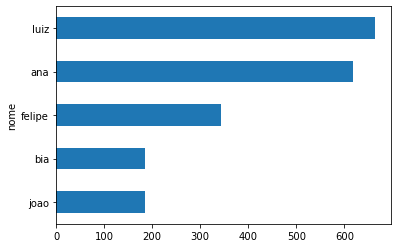

In [299]:
ValoresComicao.sort_values().plot(kind='barh')

## df.join()

In [300]:
vendas.set_index('vendedor_key', drop=True, inplace=True)
vendedores.set_index('vendedor_key', drop=True, inplace=True)

vendas = vendas.join(vendedores)

display(vendas)

,produto_key,qtde,nome,comicao_vendedor
vendedor_key,,,,
0,0,17,joao,0.05
0,2,16,joao,0.05
0,0,7,joao,0.05
0,1,30,joao,0.05
1,2,23,ana,0.06
1,1,28,ana,0.06
1,0,92,ana,0.06
1,2,42,ana,0.06
2,1,7,bia,0.04


In [302]:
vendas = vendas.set_index('produto_key').join(produtos.set_index('produto_key'))

In [304]:
vendas.reset_index(drop=True, inplace=True)

In [305]:
ProdutosVendidos = vendas.groupby('produto').sum().loc[:,'qtde']

produto
calça      195
calçado    220
camisa     270
Name: qtde, dtype: int64

<AxesSubplot:xlabel='produto'>

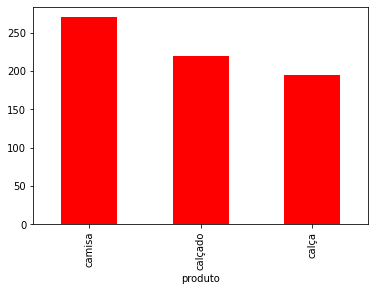

In [309]:
display(ProdutosVendidos)
ProdutosVendidos.sort_values(ascending=False).plot(kind='bar', color='red')